In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import cv2
import PIL
from PIL import Image
import math

import tensorflow
from keras.datasets import mnist
from time import sleep
import time
import sklearn

### Importation de l'image

### L'image est rognée pour cerner la zone d'intérêt

### Preprocessing using CV2 OpenCV

### PILLOW

## Compression

## Preprocess pipe

In [ ]:
P4 = PIL.Image.open("photo4.jpg")
plt.figure()
print(plt. imshow(P4))

P4gray = P4.convert("L")
P4grayar = np.asarray(P4gray)
plt.figure()
plt. imshow(P4grayar, cmap="gray")


P4grayar = P4grayar[310:610,450:750]
plt.figure()
print(plt. imshow(P4grayar, cmap="gray"))

In [ ]:
P4_t = np.copy(P4grayar)
#P1_t.setflags(write=1)

thresh = 50
for i in range(300):
    for j in range(300):
        if P4_t[i,j] <= thresh:
               P4_t[i,j] = 50
        if P4_t[i,j] > thresh:
            P4_t[i,j] = 30
            
        
print(plt. imshow(P4_t, cmap="gray"))

In [ ]:
P4g=np.asarray(P4)
P4g = P4g[310:610,450:750]
print(plt. imshow(P4g))
np.shape(P4g)

In [ ]:
P4g2 = np.copy(P4g)
for i in range(len(P4g2)):
    for j in range(len(P4g2)):
        if P4g2[i,j,2]< 200 and P4g2[i,j,1]<220 and P4g[i,j,0]<200:
            P4g2[i,j] = [255,255,255]
        else:
            P4g2[i,j] = [0,0,0]
print(plt. imshow(P4g2))

In [ ]:
P4c = Image.fromarray(np.uint8((P4g2)))
x,y = P4c.size
x2, y2 = math.floor(x-3*x/4), math.floor(y-3*y/4)
P4c = P4c.resize((x2,y2),Image.ANTIALIAS)
P4cnp = np.asarray(P4c)
print(plt. imshow(P4cnp))

In [ ]:
def preprocess(photo, comp_rate,print):
    #Photo imported using PIL and compression rate in decimal (0.9 --> 90% comp rate)
    #P1 : Rognage de la photo
    photo=np.asarray(photo)
    photo = photo[310:610,450:750]
    if(print):
        plt.figure()
        plt. imshow(photo)
        plt.title('Originale rognée')
    
    #P2 : Définition de la zone d'intérêt de la pièce
    photo2 = np.copy(photo)
    for i in range(len(photo2)):
        for j in range(len(photo2)):
            if photo2[i,j,2]< 200 and photo2[i,j,1]<220 and photo2[i,j,0]<200:
                photo2[i,j] = [255,255,255]
            else:
                photo2[i,j] = [0,0,0]
    if(print):
        plt.figure()
        plt. imshow(photo2)
        plt.title('Photo noire et blanc avec pièce isolée')
    
    #P3 : Compression de la photo en vue du modèle de ML
    Photo_c = Image.fromarray(np.uint8((photo2)))
    x,y = Photo_c.size
    x2, y2 = math.floor(x-comp_rate*x/1), math.floor(y-comp_rate*y/1)
    Photo_c = Photo_c.resize((x2,y2),Image.ANTIALIAS)
    Photo_c = np.asarray(Photo_c)
    if(print):
        plt.figure()
        plt. imshow(Photo_c)
        plt.title("Image compressée")
    
    #P4 : Cleaning Post-Compression
    photo_C2 = np.copy(Photo_c)
    for i in range(len(photo_C2)):
        for j in range(len(photo_C2)):
            if photo_C2[i,j,2]< 60 and photo_C2[i,j,1]<60 and photo_C2[i,j,0]<60:
                photo_C2[i,j] = [0,0,0]
            else:
                photo_C2[i,j] = [255,255,255]
    if(print):
        plt.figure()
        plt. imshow(photo_C2)
        plt.title('Photo finale')

start_time = time.time()
preprocess(P4,0.9,1)
T = time.time()-start_time

In [ ]:
#Calcul efficiency par rapport au compression rate

Result = pd.DataFrame()
T = []
Comp_test = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.965,0.98]
for i in Comp_test:
        start_time = time.time()
        preprocess(P4,i,0)
        T.append(time.time()-start_time)
        
Result['Compression rate'] = Comp_test
Result['Time'] = T
plt.figure()
plt.plot(Result['Compression rate']*100,Result["Time"])
plt.xlabel("Compression rate (%)")
plt.ylabel("Time (s)")
plt.show()

Result["Nombre final de pixel"] = ((1-Result['Compression rate'])*300)**2

print(Result)

In [ ]:
preprocess(P4,0.6,1)

# ML Model 1

In [ ]:
def preprocess_train(photo, comp_rate,print):
    #Photo imported using PIL and compression rate in decimal (0.9 --> 90% comp rate)
    #P1 : Rognage de la photo
    photo=np.asarray(photo)
    photo = photo[100:180,112:205]
    if(print):
        plt.figure()
        plt. imshow(photo)
        plt.title('Originale rognée')
    
    #P2 : Définition de la zone d'intérêt de la pièce
    photo2 = np.copy(photo)
    for i in range(len(photo2)):
        for j in range(np.size(photo2,1)):
            if photo2[i,j,2]< 230 and photo2[i,j,1]<230 and photo2[i,j,0]<230:
                photo2[i,j] = [255,255,255]
            else:
                photo2[i,j] = [0,0,0]
    if(print):
        plt.figure()
        plt. imshow(photo2)
        plt.title('Photo noire et blanc avec pièce isolée')
    
    #P3 : Compression de la photo en vue du modèle de ML
    Photo_c = Image.fromarray(np.uint8((photo2)))
    x,y = Photo_c.size
    x2, y2 = math.floor(x-comp_rate*x/1), math.floor(y-comp_rate*y/1)
    Photo_c = Photo_c.resize((x2,y2),Image.ANTIALIAS)
    Photo_c = np.asarray(Photo_c)
    if(print):
        plt.figure()
        plt. imshow(Photo_c)
        plt.title("Image compressée")
    
    #P4 : Cleaning Post-Compression
    photo_C2 = np.copy(Photo_c)
    for i in range(len(photo_C2)):
        for j in range(np.size(photo_C2,1)):
            if photo_C2[i,j,2]< 60 and photo_C2[i,j,1]<60 and photo_C2[i,j,0]<60:
                photo_C2[i,j] = [0,0,0]
            else:
                photo_C2[i,j] = [255,255,255]
    return(photo_C2)
    if(print):
        plt.figure()
        plt. imshow(photo_C2)
        plt.title('Photo finale')

#start_time = time.time()
#preprocess(P4,0.9,1)
#T = time.time()-start_time

In [ ]:
image_path_list = []
P = []
imageDir = "pictures white"
for file in os.listdir(imageDir):
    image_path_list.append(os.path.join(imageDir, file))
for i in range(len(image_path_list)):
    P.append(np.asarray(PIL.Image.open(image_path_list[i])))
    
    

In [ ]:
P2 = []
for i in range(len(P)):
    print("Picture",i)
    P2.append(preprocess_train(P[i],0.4,1))
    plt.figure()
    plt.imshow(P2[i])

In [ ]:
#Comp 0.3 --> 14700
#Comp 0.6 --> 4800

In [ ]:
Data = pd.DataFrame()
for i in range(len(P2)):
    tmp = np.reshape(P2[i],7920)
    Data[i] = tmp

In [ ]:
Data

In [ ]:
Data = Data.T

In [ ]:
Data = Data.drop(0)
Data = Data.drop(1)
Data = Data.drop(3)
Data = Data.drop(4)
Data = Data.drop(6)
Data = Data.drop(7)

defaut = [0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0]

In [ ]:
Data["Défauts"] = defaut

In [ ]:
Data.loc[Data["Défauts"] == 0]

In [ ]:
defaut = [0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0]

In [ ]:
Data = pd.concat([Data,Data.loc[Data["Défauts"] == 0]])

In [ ]:
Data

## Random Forest model

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

y = Data['Défauts']
X = Data.drop(['Défauts'],axis=1)
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)



In [ ]:
clf = RandomForestClassifier(max_depth=20, random_state=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
max_depth = [1,2,5,10,20,50]
accuracy = []
y_pred_all = []

for i in max_depth:
    clf = RandomForestClassifier(n_estimators=int(i))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_all.append(y_pred)
    accuracy.append(cross_val_score(clf,X,y,cv = 3, scoring = "accuracy"))
    print(i)
plt.boxplot(accuracy)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show() 

In [ ]:
plt.boxplot(accuracy)
plt.show()

## CNN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import plot_model

In [ ]:
X

In [ ]:
def cnn_model():
    model = models.Sequential()
    model.add(layers.Dense(units=7920, activation='sigmoid', input_shape=[6750]))
    model.add(layers.Dense(1000, activation='sigmoid'))
    model.add(layers.Dense(100,activation='sigmoid'))
    model.add(layers.Dense(10, activation = "sigmoid"))
    model.add(layers.Dense(1))
    return model

def cnn_model2():
    model = models.Sequential()
    model.add(layers.Dense(units=20, activation='swish', input_shape=[4800]))
    model.add(layers.Dense(15, activation='sigmoid'))
    model.add(layers.Dense(12,activation='sigmoid'))
    model.add(layers.Dense(6))
    return model


model = tf.keras.Sequential([
tf.keras.layers.Dense(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10)
])

In [ ]:
#model = cnn_model()

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(2)
])

model.summary()

In [ ]:
"""
model.compile(
    optimizer="adamax",
    loss='mse',
    metrics = 'mse'
)"""

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    X, y,
    validation_data=(X_test, y_test),
    batch_size=500,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    epochs=100)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import cv2
import PIL
from PIL import Image
import math
from time import sleep
import time
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def preprocess_train(photo, comp_rate,print):
    #Photo imported using PIL and compression rate in decimal (0.9 --> 90% comp rate)
    #P1 : Rognage de la photo
    photo=np.asarray(photo)
    photo = photo[95:185,110:210]
    if(print):
        plt.figure()
        plt. imshow(photo)
        plt.title('Originale rognée')
    
    #P2 : Définition de la zone d'intérêt de la pièce
    photo2 = np.copy(photo)
    for i in range(len(photo2)):
        for j in range(np.size(photo2,1)):
            if photo2[i,j,2]< 235 and photo2[i,j,1]<235 and photo2[i,j,0]<235:
                photo2[i,j] = [255,255,255]
            else:
                photo2[i,j] = [0,0,0]
    if(print):
        plt.figure()
        plt. imshow(photo2)
        plt.title('Photo noire et blanc avec pièce isolée')
    
    #P3 : Compression de la photo en vue du modèle de ML
    Photo_c = Image.fromarray(np.uint8((photo2)))
    x,y = Photo_c.size
    x2, y2 = math.floor(x-comp_rate*x/1), math.floor(y-comp_rate*y/1)
    Photo_c = Photo_c.resize((x2,y2),Image.ANTIALIAS)
    Photo_c = np.asarray(Photo_c)
    if(print):
        plt.figure()
        plt. imshow(Photo_c)
        plt.title("Image compressée")
    
    #P4 : Cleaning Post-Compression
    photo_C2 = np.copy(Photo_c)
    for i in range(len(photo_C2)):
        for j in range(np.size(photo_C2,1)):
            if photo_C2[i,j,2]< 60 and photo_C2[i,j,1]<60 and photo_C2[i,j,0]<60:
                photo_C2[i,j] = [0,0,0]
            else:
                photo_C2[i,j] = [255,255,255]
    if(print):
        plt.figure()
        plt. imshow(photo_C2)
        plt.title('Photo finale')
    return(photo_C2)  

def cnn_model():
    model = models.Sequential()
    model.add(layers.Dense(units=7104, activation='relu', input_shape=[14208]))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(100,activation='relu'))
    model.add(layers.Dense(10, activation = "relu"))
    model.add(layers.Dense(1))
    return model
        
#Training step : recover pictures and preprocess them

image_path_list = []
P = []
P2 = []

imageDir = "pictures white"
for file in os.listdir(imageDir):
    image_path_list.append(os.path.join(imageDir, file))
for i in range(len(image_path_list)):
    P.append(np.asarray(PIL.Image.open(image_path_list[i])))
    

for i in range(len(P)):
    #print("Picture",i)
    P2.append(preprocess_train(P[i],0.5,0))
    #plt.figure()
    #plt.imshow(P2[i])
    
#Création de la dataframe
Data = pd.DataFrame()
for i in range(len(P2)):
    tmp = np.reshape(P2[i],6750)
    Data[i] = tmp
    
Data = Data.T
#Data = Data.drop(0)
#Data = Data.drop(1)
#Data = Data.drop(3)
#Data = Data.drop(4)
#Data = Data.drop(6)
#Data = Data.drop(7)

defaut = [0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0]

Data["Défauts"] = defaut

#Data = pd.concat([Data,Data.loc[Data["Défauts"] == 0]]) #To get a balanced dataset, we add two times the 'no default' pics

y = Data['Défauts']
X = Data.drop(['Défauts'],axis=1)
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

#CNN MODEL

"""
model = cnn_model()
model.summary()

model.compile(
    optimizer="adamax",
    #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    loss = "mse",
    metrics = 'mse'
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=8,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    epochs=100)

y_pred = model.predict(X_test)

print(y_pred)
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else: y_pred[i] = 1
        
print(y_pred)
print(y_test)

"""


#RF Model

clf = RandomForestClassifier(max_depth=5, n_estimators =10, bootstrap = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_train, clf.predict(X_train)))

print(y_pred)
print(y_test)
accuracy_score(y_test, y_pred)

In [ ]:
max_depth = [1,2,5,10,20]
n_est = [10,20,50,100]
accuracy_train = []
accuracy = []
y_pred_all = []

for i in max_depth:
    for j in n_est:
        clf = RandomForestClassifier(n_estimators=int(j), max_depth = int(i), bootstrap = False)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_all.append(y_pred)
        accuracy_train.append(accuracy_score(y_train,clf.predict(X_train)))
        accuracy.append(accuracy_score(y_test,clf.predict(X_test)))
        #accuracy.append(cross_val_score(clf,X,y,cv = 3, scoring = "accuracy"))
        print(j)
    print(i)
plt.boxplot(accuracy)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
plt.plot(accuracy,label = 'test')
plt.plot(accuracy_train,label = 'train')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighb = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
accuracy = []


for i in neighb:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_all.append(y_pred)
    accuracy.append(cross_val_score(clf,X,y,cv = 3, scoring = "accuracy"))
    print(i)
plt.boxplot(accuracy)
plt.xlabel("Max depth")
plt.ylabel("# of neighbours")
plt.show()

In [ ]:
plt.boxplot(accuracy)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
P_test = PIL.Image.open("pictures white/test40.jpg")
Data = preprocess_train(P_test,0.4,1)

In [ ]:
defaut = [0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]

In [ ]:
len(defaut)

In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import cv2
import PIL
from PIL import Image
import math
from time import sleep
import time
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def preprocess_train(photo, comp_rate,print):
    #Photo imported using PIL and compression rate in decimal (0.9 --> 90% comp rate)
    #P1 : Rognage de la photo
    photo=np.asarray(photo)
    photo = photo[95:185,110:210]
    if(print):
        plt.figure()
        plt. imshow(photo)
        plt.title('Originale rognée')
    
    #P2 : Définition de la zone d'intérêt de la pièce
    photo2 = np.copy(photo)
    for i in range(len(photo2)):
        for j in range(np.size(photo2,1)):
            if photo2[i,j,2]< 235 and photo2[i,j,1]<235 and photo2[i,j,0]<235:
                photo2[i,j] = [255,255,255]
            else:
                photo2[i,j] = [0,0,0]
    if(print):
        plt.figure()
        plt. imshow(photo2)
        plt.title('Photo noire et blanc avec pièce isolée')
    
    #P3 : Compression de la photo en vue du modèle de ML
    Photo_c = Image.fromarray(np.uint8((photo2)))
    x,y = Photo_c.size
    x2, y2 = math.floor(x-comp_rate*x/1), math.floor(y-comp_rate*y/1)
    Photo_c = Photo_c.resize((x2,y2),Image.ANTIALIAS)
    Photo_c = np.asarray(Photo_c)
    if(print):
        plt.figure()
        plt. imshow(Photo_c)
        plt.title("Image compressée")
    
    #P4 : Cleaning Post-Compression
    photo_C2 = np.copy(Photo_c)
    for i in range(len(photo_C2)):
        for j in range(np.size(photo_C2,1)):
            if photo_C2[i,j,2]< 60 and photo_C2[i,j,1]<60 and photo_C2[i,j,0]<60:
                photo_C2[i,j] = [0,0,0]
            else:
                photo_C2[i,j] = [255,255,255]
    if(print):
        plt.figure()
        plt. imshow(photo_C2)
        plt.title('Photo finale')
    return(photo_C2)  
"""
def cnn_model():
    model = models.Sequential()
    model.add(layers.Dense(units=7104, activation='relu', input_shape=[14208]))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(100,activation='relu'))
    model.add(layers.Dense(10, activation = "relu"))
    model.add(layers.Dense(1))
    return model
"""        
#Training step : recover pictures and preprocess them

image_path_list = []
P = []
P2 = []

imageDir = "pictures white"
for file in os.listdir(imageDir):
    image_path_list.append(os.path.join(imageDir, file))
for i in range(len(image_path_list)):
    P.append(np.asarray(PIL.Image.open(image_path_list[i])))
    

for i in range(len(P)):
    #print("Picture",i)
    P2.append(preprocess_train(P[i],0.5,0))
    #plt.figure()
    #plt.imshow(P2[i])
    
#Création de la dataframe
Data = pd.DataFrame()
for i in range(len(P2)):
    tmp = np.reshape(P2[i],6750)
    Data[i] = tmp
    
Data = Data.T

defaut = [0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0]

Data["Défauts"] = defaut

#Data = pd.concat([Data,Data.loc[Data["Défauts"] == 0]]) #To get a balanced dataset, we add two times the 'no default' pics

y = Data['Défauts']
X = Data.drop(['Défauts'],axis=1)
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

#CNN MODEL


def cnn_model():
    model = models.Sequential()
    model.add(layers.Dense(units=2000, activation='relu', input_shape=[6750]))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(100,activation='relu'))
    model.add(layers.Dense(10, activation = "relu"))
    model.add(layers.Dense(2))
    return model

model = cnn_model()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=15,
    #callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    epochs=20)

#y_pred = model.predict(X_test)


"""
print(y_pred)
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else: y_pred[i] = 1
"""
        
#print(accuracy_score(y_train, model.predict(X_train)))
#print(y_pred)
#print(y_test)
#predictions_single = probability_model.predict(X_test)

"""


#RF Model

clf = RandomForestClassifier(max_depth=5, n_estimators =10, bootstrap = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_train, clf.predict(X_train)))

print(y_pred)
print(y_test)
accuracy_score(y_test, y_pred)

"""

Epoch 1/20
3/3 [==============================] - 3s 339ms/step - loss: 4.9695 - accuracy: 0.6056 - val_loss: 10.9868 - val_accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 0s 110ms/step - loss: 7.2478 - accuracy: 0.4000 - val_loss: 1.3302 - val_accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 0s 116ms/step - loss: 0.8275 - accuracy: 0.6194 - val_loss: 1.0632 - val_accuracy: 0.6000
Epoch 4/20
3/3 [==============================] - 0s 117ms/step - loss: 1.2899 - accuracy: 0.4806 - val_loss: 1.3638 - val_accuracy: 0.4000
Epoch 5/20
3/3 [==============================] - 0s 124ms/step - loss: 1.1321 - accuracy: 0.5694 - val_loss: 0.8353 - val_accuracy: 0.4000
Epoch 6/20
3/3 [==============================] - 0s 115ms/step - loss: 0.4861 - accuracy: 0.8306 - val_loss: 0.8878 - val_accuracy: 0.6000
Epoch 7/20
3/3 [==============================] - 0s 145ms/step - loss: 0.7916 - accuracy: 0.5361 - val_loss: 1.3935 - val_accuracy: 0.4000
Epoch 8/20
3/3 [===

'\n\n\n#RF Model\n\nclf = RandomForestClassifier(max_depth=5, n_estimators =10, bootstrap = True)\nclf.fit(X_train, y_train)\ny_pred = clf.predict(X_test)\n\nprint(accuracy_score(y_train, clf.predict(X_train)))\n\nprint(y_pred)\nprint(y_test)\naccuracy_score(y_test, y_pred)\n\n'

In [77]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [78]:
predictions = probability_model.predict(X_test)

In [79]:
print(predictions)
print(y_test)

[[8.72833967e-01 1.27166048e-01]
 [4.55793411e-01 5.44206560e-01]
 [8.45006108e-03 9.91549969e-01]
 [8.66391599e-01 1.33608371e-01]
 [3.03999156e-01 6.96000934e-01]
 [4.99974899e-02 9.50002551e-01]
 [4.47364699e-04 9.99552667e-01]
 [2.86880851e-01 7.13119149e-01]
 [9.50428903e-01 4.95710932e-02]
 [3.85012001e-01 6.14988029e-01]
 [4.93725896e-01 5.06274045e-01]
 [8.82936895e-01 1.17063031e-01]
 [8.95040631e-01 1.04959421e-01]
 [7.76508510e-01 2.23491535e-01]
 [1.21197015e-01 8.78803015e-01]]
57    0
37    0
9     1
48    0
32    1
14    1
3     1
38    0
42    0
17    1
52    1
1     0
0     0
53    0
49    0
Name: Défauts, dtype: int64


In [80]:
y_pred = []
for i in range(len(predictions)):
    if predictions[i,0]>predictions[i,1]:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [81]:
print(y_pred)
print(np.asarray(y_test))

[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
[0 0 1 0 1 1 1 0 0 1 1 0 0 0 0]


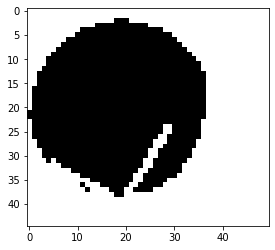

In [65]:
plt.imshow(P[54])

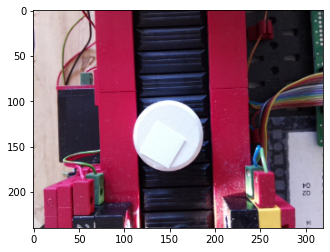

In [66]:
plt.imshow(P[54])